In [17]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('C:/Users/HP/Desktop/Dr. Shamshiripour/PAG_Count_1995-2023.csv')

In [ ]:
def standardize_date(date_str):
    parts = date_str.split()
    date_part = parts[0]
    time_part = parts[1] if len(parts) > 1 else ''
    if time_part:
        if len(time_part) == 5:
            time_part += ':00'
        elif len(time_part) == 8:
            pass
        else:
            time_part = ''
    month, day, year = date_part.split('/')
    standardized_date = f'{int(month):02}/{int(day):02}/{year}'  
    return f'{standardized_date} {time_part}'.strip()

data['ST_DATE'] = data['ST_DATE'].apply(standardize_date)
data['ST_DATE'] = pd.to_datetime(data['ST_DATE'])

In [ ]:
data = data[data['ST_DATE'].dt.year == 2022]
data['Weekday'] = data['ST_DATE'].dt.day_name()

In [ ]:
hour_cols = [f'H{i:02}' for i in range(1, 25)]
data['Daily_Total'] = data[hour_cols].sum(axis = 1)

In [ ]:
data['Month'] = data['ST_DATE'].dt.month_name()

In [ ]:
mon_fri = data[data['Weekday'].isin(['Monday', 'Friday'])]

In [ ]:
mon_fri_agg = mon_fri.groupby(['LOCAL_ID', 'Month', 'Weekday'])['Daily_Total'].mean()

In [ ]:
mon_fri_agg = mon_fri_agg.reset_index()
mon_fri_agg.columns = ['LOCAL_ID', 'Month', 'Weekday', 'Average_Total']

In [33]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
mon_fri_agg['Month'] = pd.Categorical(mon_fri_agg['Month'], categories = month_order, ordered = True)
mon_fri_agg = mon_fri_agg.sort_values(by = ['LOCAL_ID', 'Month']).reset_index(drop = True)

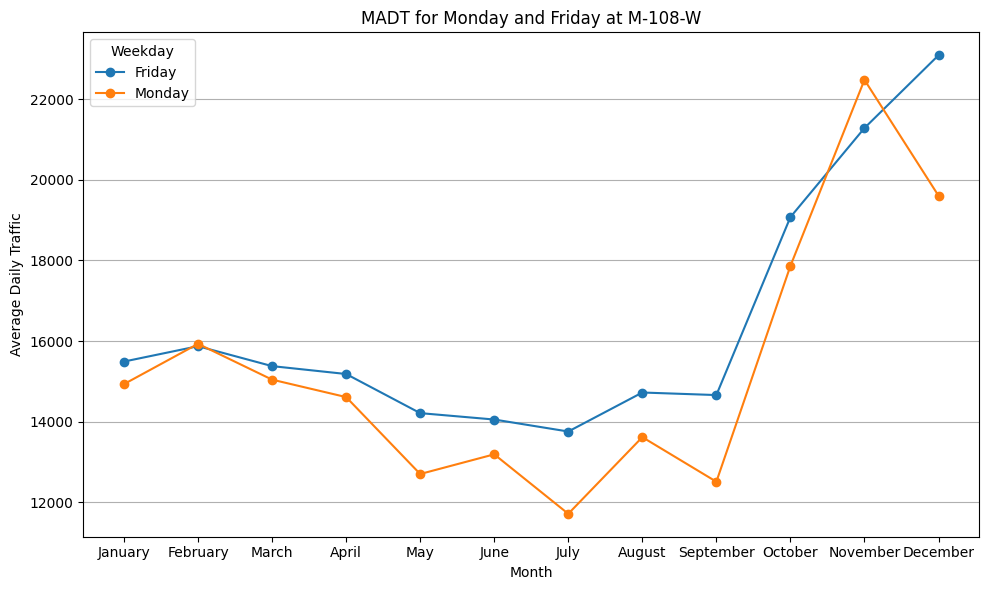

In [ ]:
def MADT_mon_fri():
    user_local_id = input('Enter LOCAL_ID: ')
    local_id_data = mon_fri_agg[mon_fri_agg['LOCAL_ID'] == user_local_id]
    if local_id_data.empty:
        print(f'No Monday and Friday data found for LOCAL_ID: {user_local_id}.')
    else:
        plt.figure(figsize = (10, 6))
        for weekday in local_id_data['Weekday'].unique():
            weekday_data = local_id_data[local_id_data['Weekday'] == weekday]
            plt.plot(weekday_data['Month'], weekday_data['Average_Total'], marker = 'o', label = weekday)
        plt.title(f'MADT for Monday and Friday at {user_local_id}')
        plt.xlabel('Month')
        plt.ylabel('Average Daily Traffic')
        plt.legend(title = 'Weekday')
        plt.grid(axis = 'y')
        plt.tight_layout()
        plt.show()

MADT_mon_fri()

In [ ]:
weekdays = data[data['Weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekdays_agg = weekdays.groupby(['LOCAL_ID', 'Month'])['Daily_Total'].mean()
weekdays_agg = weekdays_agg.reset_index()
weekdays_agg.columns = ['LOCAL_ID', 'Month', 'Average_Total']

In [ ]:
weekdays_agg['Month'] = pd.Categorical(weekdays_agg['Month'], categories = month_order, ordered = True)
weekdays_agg = weekdays_agg.sort_values(by = ['LOCAL_ID', 'Month']).reset_index(drop = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20336\3155840667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_id_data['Residual'] = local_id_data['Average_Total'] - aadt


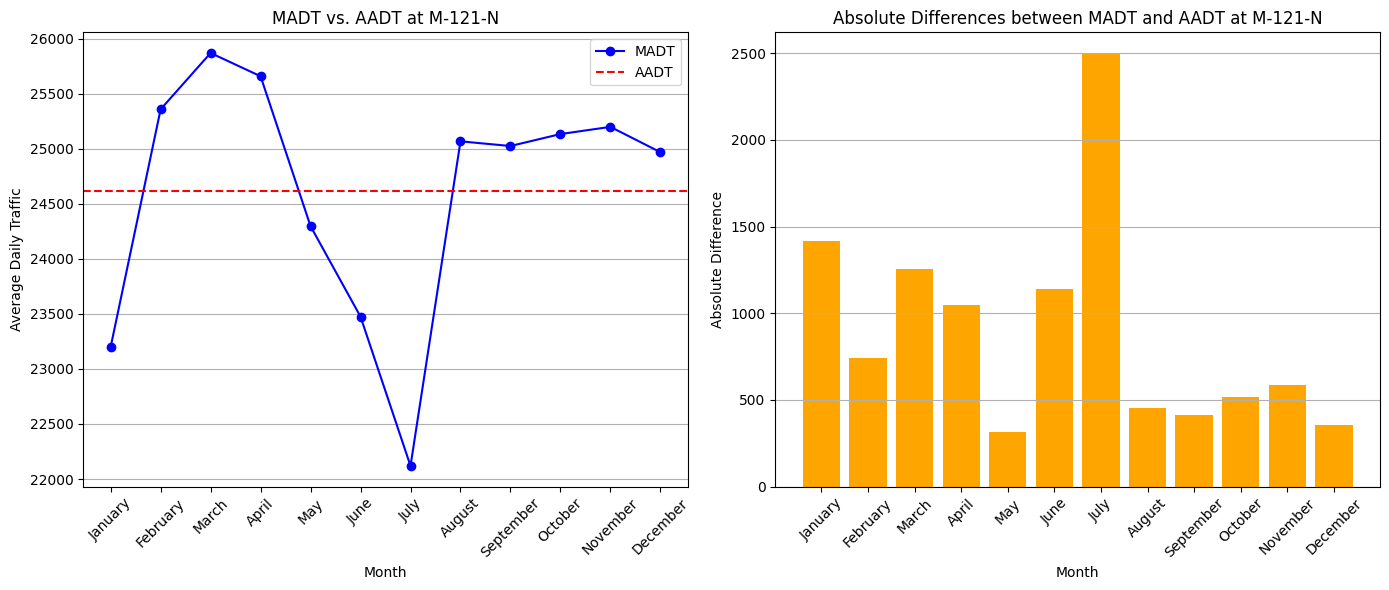

In [ ]:
def MADT_vs_AADT():
    user_local_id = input('Enter LOCAL_ID: ')
    local_id_data = weekdays_agg[weekdays_agg['LOCAL_ID'] == user_local_id]
    if local_id_data.empty:
        print(f'No data found for LOCAL_ID: {user_local_id}.')
    else:
        aadt = local_id_data['Average_Total'].mean()
        local_id_data['Residual'] = local_id_data['Average_Total'] - aadt
        fig, axs = plt.subplots(1, 2, figsize = (14, 6))

        axs[0].plot(local_id_data['Month'], local_id_data['Average_Total'], marker = 'o', label = 'MADT', color = 'blue')
        axs[0].axhline(aadt, color = 'red', linestyle = '--', label = 'AADT')
        axs[0].set_title(f'MADT vs. AADT at {user_local_id}')
        axs[0].set_xlabel('Month')
        axs[0].set_ylabel('Average Daily Traffic')
        axs[0].legend()
        axs[0].grid(axis = 'y')
        axs[0].set_xticks(local_id_data['Month'])
        axs[0].tick_params(axis = 'x', rotation = 45)
        
        axs[1].bar(local_id_data['Month'], local_id_data['Residual'], color = 'orange')
        axs[1].set_title(f'Differences between MADT and AADT at {user_local_id}')
        axs[1].set_xlabel('Month')
        axs[1].set_ylabel('Difference')
        axs[1].grid(axis = 'y')
        axs[1].set_xticks(local_id_data['Month'])
        axs[1].tick_params(axis = 'x', rotation = 45)

        plt.tight_layout()
        plt.show()

MADT_vs_AADT()